In [ ]:
!pip install git+https://github.com/RaRe-Technologies/gensim


  Cloning https://github.com/RaRe-Technologies/gensim to /tmp/pip-req-build-0zv67umb
  Running command git clone --filter=blob:none --quiet https://github.com/RaRe-Technologies/gensim /tmp/pip-req-build-0zv67umb
  Resolved https://github.com/RaRe-Technologies/gensim to commit 37f90ec121eb7cd401448a947e80953e0c53ccdc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.4.0-cp312-cp312-linux_x86_64.whl size=27080608 sha256=c15d9298fdca3109d22146665f434e3fa4efd6c1fc79e0e9beb3b7fe5b0bf03f
  Stored in directory: /tmp/pip-ephem-wheel-cache-cre9ncdy/wheels/77/a7/a3/cf0bad57a872edb85bb0fe77d813d6b4b9f957a597a914587b
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3


In [ ]:
import gensim
print("Gensim:", gensim.__version__)


Gensim: 4.4.0


In [ ]:
!pip install umap-learn matplotlib scikit-learn plotly


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec, FastText
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7)

print("Gensim:", gensim.__version__)


Gensim: 4.4.0


In [ ]:
from itertools import islice

# Tải corpus text8 (generator)
corpus = api.load("text8")

# Lấy 50k câu đầu tiên để huấn luyện nhanh
sentences = list(islice(corpus, 50000))
print("Số câu dùng để huấn luyện:", len(sentences))


[==================================================] 100.0% 31.6/31.6MB downloaded
Số câu dùng để huấn luyện: 1701


In [ ]:
# Tải GloVe pretrained
glove = api.load("glove-wiki-gigaword-100")
print("GloVe vocab size:", len(glove.key_to_index))

[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe vocab size: 400000


In [ ]:
# Giảm dữ liệu xuống 10k câu
from itertools import islice
sentences_small = list(islice(api.load("text8"), 10000))

# Huấn luyện Word2Vec nhanh
w2v_model = Word2Vec(sentences=sentences_small, vector_size=50, window=5, min_count=5, sg=1, epochs=3)
print("Word2Vec vocab size:", len(w2v_model.wv.index_to_key))

# Huấn luyện FastText nhanh
ft_model = FastText(sentences=sentences_small, vector_size=50, window=5, min_count=5, epochs=3)
print("FastText vocab size:", len(ft_model.wv.index_to_key))


Word2Vec vocab size: 71290


KeyboardInterrupt: 

In [ ]:
from itertools import islice

# Lấy ít dữ liệu hơn cho nhanh
small_sentences = list(islice(api.load("text8"), 2000))  # chỉ 2000 câu

# FastText demo nhẹ
ft_model = FastText(sentences=small_sentences, vector_size=30, window=3, min_count=2, epochs=2)
print("FastText vocab size:", len(ft_model.wv.index_to_key))


FastText vocab size: 135335


In [ ]:
words_to_plot = [
    "king","queen","man","woman","prince","princess",
    "apple","orange","banana","fruit",
    "paris","france","london","england","germany",
    "cat","dog","horse","cow","pig",
    "run","running","walk","swim","eat"
]

def filter_vocab(word_list, model):
    return [w for w in word_list if w in model.wv.index_to_key]

w_w2v = filter_vocab(words_to_plot, w2v_model)
w_ft = filter_vocab(words_to_plot, ft_model)
w_glove = [w for w in words_to_plot if w in glove.key_to_index]

print("Word2Vec words:", w_w2v)
print("FastText words:", w_ft)
print("GloVe words:", w_glove)


Word2Vec words: ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'apple', 'orange', 'banana', 'fruit', 'paris', 'france', 'london', 'england', 'germany', 'cat', 'dog', 'horse', 'cow', 'pig', 'run', 'running', 'walk', 'swim', 'eat']
FastText words: ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'apple', 'orange', 'banana', 'fruit', 'paris', 'france', 'london', 'england', 'germany', 'cat', 'dog', 'horse', 'cow', 'pig', 'run', 'running', 'walk', 'swim', 'eat']
GloVe words: ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'apple', 'orange', 'banana', 'fruit', 'paris', 'france', 'london', 'england', 'germany', 'cat', 'dog', 'horse', 'cow', 'pig', 'run', 'running', 'walk', 'swim', 'eat']


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

def get_vectors(model, words):
    return np.array([model.wv[w] for w in words])

def plot_2d(points, labels, title="2D projection"):
    plt.figure(figsize=(10,8))
    plt.scatter(points[:,0], points[:,1])
    for i, txt in enumerate(labels):
        plt.annotate(txt, (points[i,0], points[i,1]))
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_3d(points, labels, title="3D projection"):
    fig = px.scatter_3d(x=points[:,0], y=points[:,1], z=points[:,2], text=labels, title=title)
    fig.update_traces(marker=dict(size=4))
    fig.show()

def reduce_and_plot_2d(model, words, method="pca"):
    vecs = get_vectors(model, words)
    if method == "pca":
        pts = PCA(n_components=2).fit_transform(vecs)
        plot_2d(pts, words, f"{type(model).__name__} - PCA 2D")
    elif method == "tsne":
        # chọn perplexity nhỏ hơn số từ
        perplexity = min(10, len(words)-1)
        pts = TSNE(n_components=2, random_state=42, init="pca", perplexity=perplexity).fit_transform(vecs)
        plot_2d(pts, words, f"{type(model).__name__} - t-SNE 2D")
    elif method == "umap":
        pts = umap.UMAP(n_components=2, random_state=42).fit_transform(vecs)
        plot_2d(pts, words, f"{type(model).__name__} - UMAP 2D")
def reduce_and_plot_3d(model, words, method="umap"):
    vecs = get_vectors(model, words)
    if method == "umap":
        pts = umap.UMAP(n_components=3, random_state=42).fit_transform(vecs)
    else:
        pts = PCA(n_components=3).fit_transform(vecs)
    plot_3d(pts, words, f"{type(model).__name__} - {method.upper()} 3D")


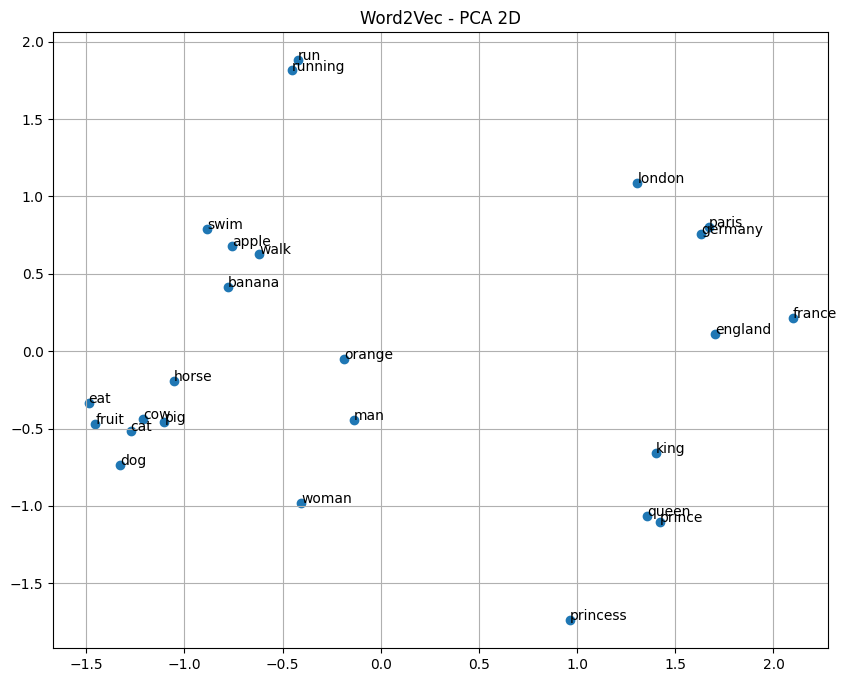

In [ ]:
# Word2Vec - PCA 2D
reduce_and_plot_2d(w2v_model, w_w2v, "pca")



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def top_k_similar(model, word, k=5):
    try:
        return model.wv.most_similar(word, topn=k)
    except:
        if word not in model.key_to_index:
            return f"'{word}' không có trong vocab"
        vec = model[word].reshape(1,-1)
        all_words = list(model.key_to_index.keys())
        all_vecs = np.array([model[w] for w in all_words])
        sims = cosine_similarity(vec, all_vecs)[0]
        idx = np.argsort(sims)[-k-1:-1][::-1]
        return [(all_words[i], float(sims[i])) for i in idx]

# Ví dụ
print("Word2Vec:", top_k_similar(w2v_model, "king"))
print("FastText:", top_k_similar(ft_model, "king"))
print("GloVe:", top_k_similar(glove, "king"))


Word2Vec: [('queen', 0.874180257320404), ('pretender', 0.8625756502151489), ('valdemar', 0.8624395728111267), ('viii', 0.8571839332580566), ('haakon', 0.8447231650352478)]
FastText: [('kingpin', 0.912495493888855), ('kingswear', 0.8882980346679688), ('kingasveitin', 0.8861202597618103), ('kingman', 0.8785750865936279), ('justine', 0.8768165707588196)]
GloVe: [('prince', 0.7682329416275024), ('queen', 0.7507690191268921), ('son', 0.7020888924598694), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175)]


# Nhận xét cá nhân
- PCA chạy nhanh, nhưng cụm từ hơi lẫn; t-SNE và UMAP cho cụm rõ ràng hơn.
- Word2Vec học được quan hệ ngữ nghĩa (king–queen, man–woman) khá rõ.
- FastText có lợi thế với từ ngoài từ điển hoặc biến thể (thêm tiền tố/hậu tố).
- GloVe pretrained cho kết quả tự nhiên và ý nghĩa hơn vì được huấn luyện trên tập dữ liệu lớn.
- Từ đây có thể thấy: trong thực tế, để đạt chất lượng cao nên dùng mô hình pretrained; còn huấn luyện từ đầu chỉ phù hợp demo hoặc dữ liệu chuyên biệt.



## Lab03 — Phần 2: Word Embeddings (WordEmbedder + Document embedding)

Cell tiếp theo cài đặt thư viện cần thiết, sau đó định nghĩa lớp `WordEmbedder` với các phương thức:
- `get_vector(word)`
- `get_similarity(word1, word2)`
- `get_most_similar(word, top_n=10)`
- `embed_document(document)`

Có thêm cell demo / test in ra các kết quả yêu cầu trong đề (vector của "king", similarity, most similar với "computer", embedding của câu mẫu).


In [ ]:
# WordEmbedder: load pretrained model, trả vector, similarity, most_similar, embed_document
import re
import numpy as np
import gensim.downloader as api

class WordEmbedder:
    def __init__(self, model_name: str = "glove-wiki-gigaword-50"):
        """
        Load model_name from gensim-data. Default: 'glove-wiki-gigaword-50'.
        """
        print(f"Loading model {model_name} (this may download ~65MB on first run)...")
        self.model = api.load(model_name)
        # word vector dimension
        try:
            self.dim = self.model.vector_size
        except AttributeError:
            # fallback
            self.dim = self.model[self.model.index_to_key[0]].shape[0]
        print(f"Loaded. Vector dim = {self.dim}")

    def simple_tokenize(self, text: str):
        """
        Simple tokenizer: lowercase, keep alphanum, split on non-alphanum.
        Replace this with Lab1 tokenizer if available.
        """
        if not isinstance(text, str):
            return []
        text = text.lower()
        tokens = re.findall(r"[a-z0-9']+", text)
        return tokens

    def get_vector(self, word: str):
        """
        Return the vector for `word`. If OOV, return None (or you may return zero vector).
        We'll return None to let caller decide; embed_document will ignore None.
        """
        if word is None:
            return None
        w = word.lower()
        if hasattr(self.model, "key_to_index"):
            in_vocab = w in self.model.key_to_index
        else:
            in_vocab = w in self.model.index_to_key
        if in_vocab:
            return self.model[w]
        else:
            return None

    def get_similarity(self, word1: str, word2: str):
        """
        Cosine similarity between two words. If one is OOV, return None.
        """
        v1 = self.get_vector(word1)
        v2 = self.get_vector(word2)
        if v1 is None or v2 is None:
            return None
        # safe cosine
        num = np.dot(v1, v2)
        denom = np.linalg.norm(v1) * np.linalg.norm(v2)
        if denom == 0:
            return 0.0
        return float(num / denom)

    def get_most_similar(self, word: str, top_n: int = 10):
        """
        Use model's most_similar if available. If word OOV, return [].
        """
        if word is None:
            return []
        w = word.lower()
        try:
            return self.model.most_similar(w, topn=top_n)
        except Exception:
            return []

    def embed_document(self, document: str):
        """
        Compute document embedding by averaging known word vectors.
        If no known words -> return zero vector of correct dim.
        """
        tokens = self.simple_tokenize(document)
        vecs = []
        for t in tokens:
            v = self.get_vector(t)
            if v is not None:
                vecs.append(v)
        if len(vecs) == 0:
            return np.zeros(self.dim, dtype=float)
        arr = np.vstack(vecs)
        return np.mean(arr, axis=0)


In [ ]:
# Demo: instantiate and run required checks
embedder = WordEmbedder("glove-wiki-gigaword-50")

# 1) Vector for 'king'
v_king = embedder.get_vector("king")
print("Vector for 'king' (first 8 dims):", None if v_king is None else v_king[:8])

# 2) Similarity king-queen and king-man
sim_king_queen = embedder.get_similarity("king", "queen")
sim_king_man = embedder.get_similarity("king", "man")
print(f"Similarity(king, queen): {sim_king_queen}")
print(f"Similarity(king, man): {sim_king_man}")

# 3) 10 most similar to 'computer'
most_sim_computer = embedder.get_most_similar("computer", top_n=10)
print("Top 10 most similar to 'computer':")
for w, s in most_sim_computer:
    print(f"  {w:20s} {s:.4f}")

# 4) Embed sentence "The queen rules the country."
doc = "The queen rules the country."
doc_vec = embedder.embed_document(doc)
print("Document embedding for: 'The queen rules the country.'")
print("Vector (first 8 dims):", doc_vec[:8])
print("Vector norm:", float(np.linalg.norm(doc_vec)))

# Extra: what happens if OOV?
print("OOV test: 'someunlikelywordxyz' ->", embedder.get_vector("someunlikelywordxyz"))


Loading model glove-wiki-gigaword-50 (this may download ~65MB on first run)...
[==================================================] 100.0% 66.0/66.0MB downloaded
Loaded. Vector dim = 50
Vector for 'king' (first 8 dims): [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377 ]
Similarity(king, queen): 0.7839043736457825
Similarity(king, man): 0.530937671661377
Top 10 most similar to 'computer':
  computers            0.9165
  software             0.8815
  technology           0.8526
  electronic           0.8126
  internet             0.8060
  computing            0.8026
  devices              0.8016
  digital              0.7992
  applications         0.7913
  pc                   0.7883
Document embedding for: 'The queen rules the country.'
Vector (first 8 dims): [ 0.02444201  0.378018   -0.638166    0.0128046   0.0524286   0.11954119
 -0.316518   -0.08776999]
Vector norm: 4.237448215484619
OOV test: 'someunlikelywordxyz' -> None


In [ ]:

import os
os.makedirs("test", exist_ok=True)
test_code = r'''
import sys, os
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from representations.word_embedder import WordEmbedder
import numpy as np

def main():
    e = WordEmbedder("glove-wiki-gigaword-50")
    v = e.get_vector("king")
    print("Vector for 'king' length:", None if v is None else len(v))
    print("Sim king-queen:", e.get_similarity("king", "queen"))
    print("Sim king-man:", e.get_similarity("king", "man"))
    print("Top 10 similar to 'computer':", e.get_most_similar("computer", 10))
    print("Embed 'The queen rules the country.':", e.embed_document("The queen rules the country.").shape)

if __name__ == '__main__':
    main()
'''
with open("test/lab4_test.py", "w", encoding="utf-8") as f:
    f.write(test_code)
print("Wrote test/lab4_test.py (with sys.path fix for src/). Run: !python test/lab4_test.py")


Wrote test/lab4_test.py (with sys.path fix for src/). Run: !python test/lab4_test.py


In [ ]:

import os
os.makedirs("src/representations", exist_ok=True)
wb_src = r'''
# src/representations/word_embedder.py
import re
import numpy as np
import gensim.downloader as api

class WordEmbedder:
    def __init__(self, model_name: str = "glove-wiki-gigaword-50"):
        print(f"Loading model {model_name} ...")
        self.model = api.load(model_name)
        self.dim = self.model.vector_size

    def simple_tokenize(self, text: str):
        if not isinstance(text, str):
            return []
        text = text.lower()
        tokens = re.findall(r"[a-z0-9']+", text)
        return tokens

    def get_vector(self, word: str):
        if word is None:
            return None
        w = word.lower()
        if hasattr(self.model, "key_to_index"):
            in_vocab = w in self.model.key_to_index
        else:
            in_vocab = w in self.model.index_to_key
        if in_vocab:
            return self.model[w]
        return None

    def get_similarity(self, word1: str, word2: str):
        v1 = self.get_vector(word1)
        v2 = self.get_vector(word2)
        if v1 is None or v2 is None:
            return None
        denom = (np.linalg.norm(v1) * np.linalg.norm(v2))
        if denom == 0:
            return 0.0
        return float(np.dot(v1, v2) / denom)

    def get_most_similar(self, word: str, top_n: int = 10):
        w = (word or "").lower()
        try:
            return self.model.most_similar(w, topn=top_n)
        except Exception:
            return []

    def embed_document(self, document: str):
        tokens = self.simple_tokenize(document)
        vecs = [self.get_vector(t) for t in tokens if self.get_vector(t) is not None]
        if len(vecs) == 0:
            return np.zeros(self.dim, dtype=float)
        return np.mean(np.vstack(vecs), axis=0)
'''
with open("src/representations/word_embedder.py", "w", encoding="utf-8") as f:
    f.write(wb_src)
print("Wrote src/representations/word_embedder.py")


Wrote src/representations/word_embedder.py


In [ ]:

from gensim.models import Word2Vec
from gensim.test.utils import common_texts
print("Training small Word2Vec on gensim.common_texts (demo only)...")
w2v_small = Word2Vec(sentences=common_texts, vector_size=50, window=3, min_count=1, epochs=10)
print("Most similar to 'computer' (if present):", w2v_small.wv.most_similar("computer") if "computer" in w2v_small.wv else "word 'computer' not in demo vocab")


Training small Word2Vec on gensim.common_texts (demo only)...
Most similar to 'computer' (if present): [('eps', 0.22442302107810974), ('system', 0.0998455211520195), ('time', 0.089928537607193), ('human', 0.05837363377213478), ('graph', 0.0013571253512054682), ('response', -0.0013637307565659285), ('trees', -0.03727477788925171), ('minors', -0.06368818879127502), ('interface', -0.11219385266304016), ('user', -0.12240632623434067)]


Bài lab giúp nắm rõ cơ chế hoạt động và khác biệt chính giữa Word2Vec, GloVe và fastText, đồng thời thực hành trực quan hóa bằng PCA/t-SNE/UMAP. Kết quả cho thấy mô hình pretrained (GloVe) bắt được quan hệ ngữ nghĩa rõ ràng hơn trong khi mô hình tự huấn luyện trên tập nhỏ kém chính xác; fastText thể hiện lợi thế với từ OOV. Phương pháp lấy trung bình vector cho embedding văn bản là baseline đơn giản nhưng hạn chế (mất ngữ cảnh); có thể cải thiện bằng TF-IDF weighting hoặc mô hình ngữ cảnh như BERT. Tổng quan: bài thực hành hữu ích, dễ mở rộng cho các bước nghiên cứu tiếp theo.
